# 1. Importing relevant Libraries and Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
# To display all results of a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Setting display options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')

- **Reading Data**

In [4]:
# Reading the data

housing = pd.read_csv('train.csv')

In [5]:
# Checking head of the data set

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Checking structure of data

In [6]:
# Checking shape of the data

housing.shape

(1460, 81)

In [7]:
# Looking at info of columns

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Checking for central tendency and variance of numerical columns in the data

housing.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567

# 3. Data cleaning, missing values and  outliers

In [9]:
# Checking for duplicates

housing.duplicated().sum()

0

In [10]:
# Checking for missing values

round(housing.isnull().sum()/len(housing.index)*100, 4)

Id                0.0000
MSSubClass        0.0000
MSZoning          0.0000
LotFrontage      17.7397
LotArea           0.0000
Street            0.0000
Alley            93.7671
LotShape          0.0000
LandContour       0.0000
Utilities         0.0000
LotConfig         0.0000
LandSlope         0.0000
Neighborhood      0.0000
Condition1        0.0000
Condition2        0.0000
BldgType          0.0000
HouseStyle        0.0000
OverallQual       0.0000
OverallCond       0.0000
YearBuilt         0.0000
YearRemodAdd      0.0000
RoofStyle         0.0000
RoofMatl          0.0000
Exterior1st       0.0000
Exterior2nd       0.0000
MasVnrType        0.5479
MasVnrArea        0.5479
ExterQual         0.0000
ExterCond         0.0000
Foundation        0.0000
BsmtQual          2.5342
BsmtCond          2.5342
BsmtExposure      2.6027
BsmtFinType1      2.5342
BsmtFinSF1        0.0000
BsmtFinType2      2.6027
BsmtFinSF2        0.0000
BsmtUnfSF         0.0000
TotalBsmtSF       0.0000
Heating           0.0000


- **Creating 'Age' column from 'YearBuilt'**

In [11]:
housing['Age(in Years)'] = 2020-housing['YearBuilt']

- **Converting 'NA' values to its relevant Category as they are not actually 'Null Values'**

In [12]:
housing.loc[housing['Alley'].isnull(), 'Alley'] = 'No alley access'
housing.loc[housing['FireplaceQu'].isnull(), 'FireplaceQu'] = 'No Fireplace'
housing.loc[housing['PoolQC'].isnull(), 'PoolQC'] = 'No Pool'
housing.loc[housing['Fence'].isnull(), 'Fence'] = 'No Fence'
housing.loc[housing['BsmtQual'].isnull(), 'BsmtQual'] = 'No Basement'
housing.loc[housing['BsmtCond'].isnull(), 'BsmtCond'] = 'No Basement'
housing.loc[housing['BsmtExposure'].isnull(), 'BsmtExposure'] = 'No Basement'
housing.loc[housing['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'No Basement'
housing.loc[housing['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'No Basement'
housing.loc[housing['GarageType'].isnull(), 'GarageType'] = 'No Garage'
housing.loc[housing['GarageFinish'].isnull(), 'GarageFinish'] = 'No Garage'
housing.loc[housing['GarageQual'].isnull(), 'GarageQual'] = 'No Garage'
housing.loc[housing['GarageCond'].isnull(), 'GarageCond'] = 'No Garage'

- **Dropping variables with more than 40% NA values and unnecessary columns**

In [13]:
# Dropping columns with more than 40% NA values and unnecessary columns

housing.drop(['Id', 'YearBuilt','MiscFeature', 'YrSold', 'GarageYrBlt', 'YearRemodAdd', 'MoSold'], axis=1, inplace=True)

- **Imputing missing value by using `Mean` as they are numerical and have outliers**

In [14]:
housing.loc[housing['LotFrontage'].isnull(), 'LotFrontage'] = housing['LotFrontage'].mean()
housing.loc[housing['MasVnrArea'].isnull(), 'MasVnrArea'] = housing['MasVnrArea'].mean()

- **Imputing missing value by using `Mode` as they are categorical**

In [15]:
housing.loc[housing['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
housing.loc[housing['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [16]:
# Checking how many columns have null percentage more than 0 after modification

len(list(list(np.where((round((housing.isnull().sum()/len(housing.index))*100,2))>0))[0]))

0

- **Dropping skewed variables i.e. any categorical or discrete variables having more than 85% data points in particular category**

In [17]:
# Creating list of very Skewed variables which have more than 80% of a particular category

obj_cols = []
skew_vars = []
for i in housing.columns:
    if housing[i].dtype in ['object']:
        obj_cols.append(i)

for col in obj_cols:
    for i in housing[col].value_counts():
        if (i/len(housing.index)*100 > 80):
            skew_vars.append(col)
skew_vars.sort()
print(skew_vars, end='')

['Alley', 'BldgType', 'BsmtCond', 'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'Fence', 'Functional', 'GarageCond', 'GarageQual', 'Heating', 'LandContour', 'LandSlope', 'PavedDrive', 'PoolQC', 'RoofMatl', 'SaleCondition', 'SaleType', 'Street', 'Utilities']

In [18]:
# Removing very skewed categorical variables as these do not contain much information

housing.drop(skew_vars, axis=1, inplace=True)

In [19]:
# Creating list of very Skewed discrete variables which have more than 80% of a particular category

int_cols = []
skew_int = []
for i in housing.columns:
    if housing[i].dtype in ['int64']:
        int_cols.append(i)

for col in int_cols:
    for i in housing[col].value_counts():
        if (i/len(housing.index)*100 > 80):
            skew_int.append(col)
skew_int.sort()
print(skew_int, end='')

['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'KitchenAbvGr', 'LowQualFinSF', 'MiscVal', 'PoolArea', 'ScreenPorch']

In [20]:
# Removing very skewed discrete('int') variables as these do not contain much information

housing.drop(skew_int, axis=1, inplace=True)

In [21]:
# Checking head after modification

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age(in Years)
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,208500,17
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,181500,44
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,223500,19
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,140000,105
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,250000,20


In [22]:
# Checking shape after modification

housing.shape

(1460, 43)

- **Combining categories with very less data points into one category**

In [23]:
# Combining categories with very less data points in 'LotConfig' variable into one

housing['LotConfig'].replace('CulDSac', 'Others', inplace=True)
housing['LotConfig'].replace('FR2', 'Others', inplace=True)
housing['LotConfig'].replace('FR3', 'Others', inplace=True)

In [24]:
# Combining categories with very less data points in 'HouseStyle' variable into one

housing['HouseStyle'].replace('1.5Unf', 'Others', inplace=True)
housing['HouseStyle'].replace('2.5Unf', 'Others', inplace=True)
housing['HouseStyle'].replace('2.5Fin', 'Others', inplace=True)

In [25]:
# Combining categories with very less data points in 'RoofStyle' variable into one

housing['RoofStyle'].replace('Flat', 'Others', inplace=True)
housing['RoofStyle'].replace('Gambrel', 'Others', inplace=True)
housing['RoofStyle'].replace('Mansard', 'Others', inplace=True)
housing['RoofStyle'].replace('Shed', 'Others', inplace=True)

In [26]:
# Combining categories with very less data points in 'Exterior1st' variable into one

housing['Exterior1st'].replace('AsbShng', 'Others', inplace=True)
housing['Exterior1st'].replace('BrkComm', 'Others', inplace=True)
housing['Exterior1st'].replace('Stone', 'Others', inplace=True)
housing['Exterior1st'].replace('AsphShn', 'Others', inplace=True)
housing['Exterior1st'].replace('ImStucc', 'Others', inplace=True)
housing['Exterior1st'].replace('CBlock', 'Others', inplace=True)

In [27]:
# Combining categories with very less data points in 'Exterior2nd' variable into one

housing['Exterior2nd'].replace('Other', 'Others', inplace=True)
housing['Exterior2nd'].replace('Brk Cmn', 'Others', inplace=True)
housing['Exterior2nd'].replace('Stone', 'Others', inplace=True)
housing['Exterior2nd'].replace('AsphShn', 'Others', inplace=True)
housing['Exterior2nd'].replace('ImStucc', 'Others', inplace=True)
housing['Exterior2nd'].replace('CBlock', 'Others', inplace=True)

In [28]:
# Combining categories with very less data points in 'Foundation' variable into one

housing['Foundation'].replace('Slab', 'Others', inplace=True)
housing['Foundation'].replace('Stone', 'Others', inplace=True)
housing['Foundation'].replace('Wood', 'Others', inplace=True)

In [29]:
# Combining categories with very less data points in 'GarageType' variable into one

housing['GarageType'].replace('Basment', 'Others', inplace=True)
housing['GarageType'].replace('CarPort', 'Others', inplace=True)
housing['GarageType'].replace('2Types', 'Others', inplace=True)

- **Checking for outliers**

In [30]:
# Creating list of variables to check for outliers

num_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 
             'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
             'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Age(in Years)']
# Checking for central tendency and variance of numerical columns in the data

housing[num_cols].describe(percentiles=[0.25, 0.50, 0.75, 0.99])

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,Age(in Years)
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,6.517808,472.980137,94.244521,46.660274,48.732192
std,22.024023,9981.264932,1.382997,180.569112,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,1.625393,213.804841,125.338794,66.256028,30.202904
min,21.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000,10.000000
25%,60.000000,7553.500000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,5.000000,334.500000,0.000000,0.000000,20.000000
50%,70.049958,9478.500000,6.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,6.000000,480.000000,0.000000,25.000000,47.000000
75%,79.000000,11601.500000,7.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,7.000000,576.000000,168.000000,68.000000,66.000000
99%,137.410000,37567.640000,10.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,11.000000,1002.790000,505.460000,285.820000,120.820000
max,313.000000,215245.000000,10.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,14.000000,1418.000000,857.000000,547.000000,148.000000


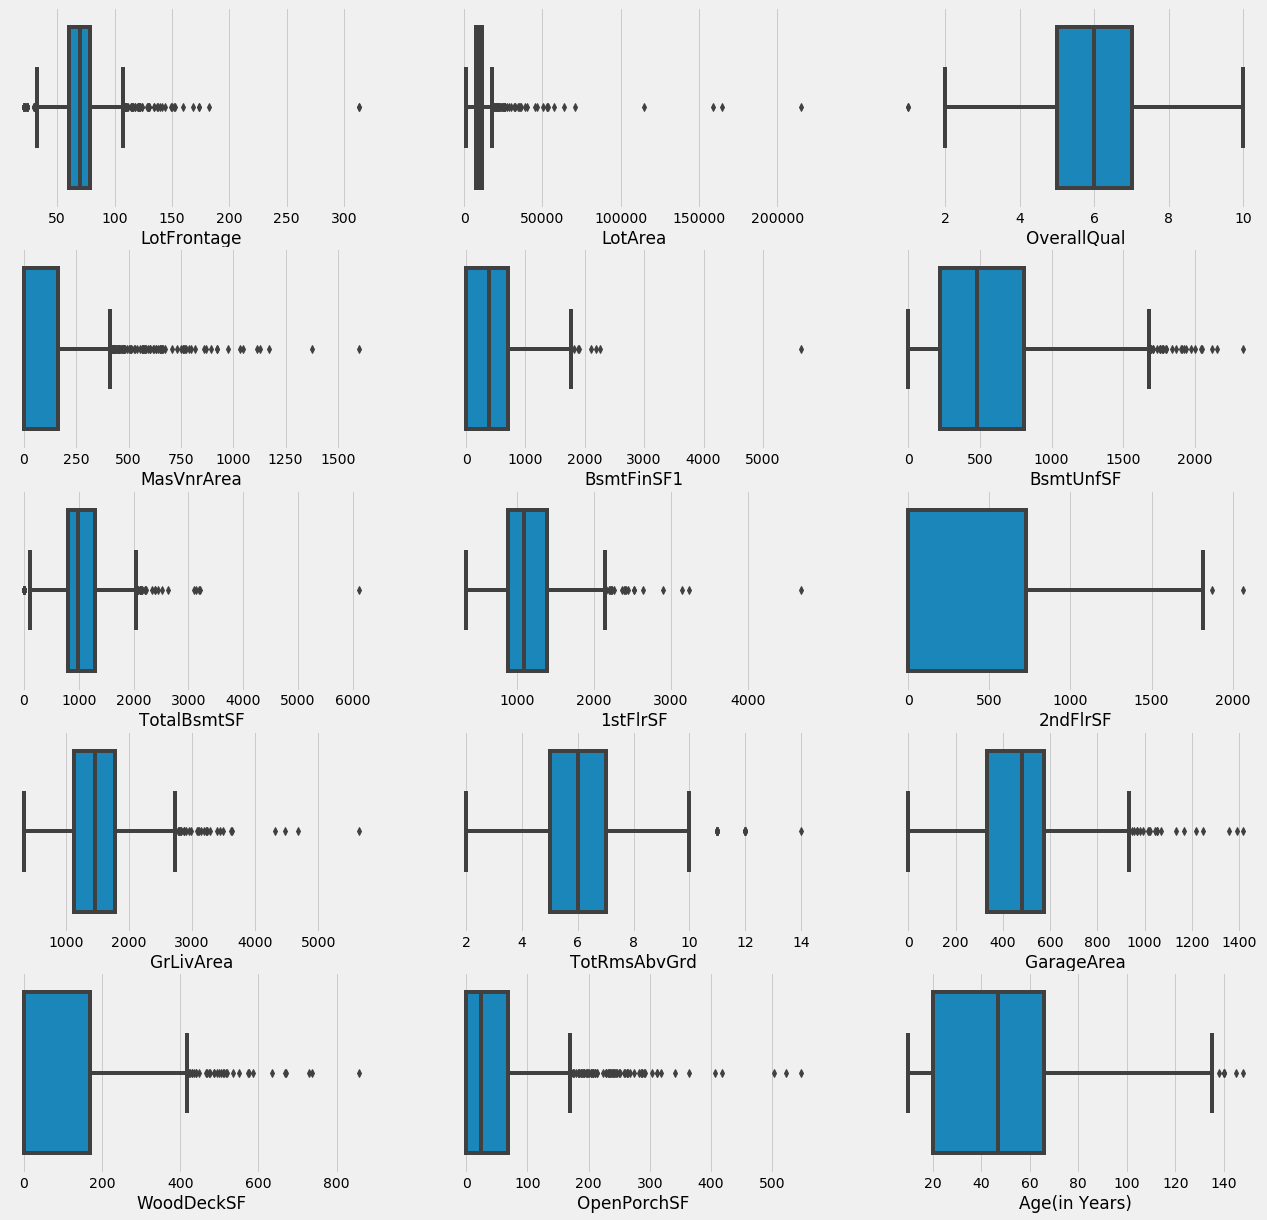

In [31]:
# Plotting boxplot for numerical variables

plt.figure(figsize=(20,20))
for i in enumerate(num_cols):
    plt.subplot(5,3,i[0]+1)
    sb.boxplot(housing[i[1]])

plt.show();

- Q1 = 25 percentile, Q2 = 50 percentile, Q3 = 75 percentile, `IQR` = Q3 - Q2
- Commonly used metric for outlier detection is `IQR` 1.5 rule
- The `IOR` 1.5 rule is that data point less than lower limit i.e (Q1 - IQR\*1.5) and more than upper limit i.e ( Q3 + IQR\*1.5) are considered to be an outlier

- Used the above mentioned describe function for performing analysis
<br>

- **Observations:**
- **LotFrontage:**
- Boxplot is skewed due to the outliers
- There are outliers above upper whisker and below the lower whisker, outliers above upper whisker are more
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 60 linear feet and 80 linear feet
- Mean value and median value is similar
- Within the IQR, the spread of data points above and below the median are same
- **LotArea:**
- Boxplot is very skewed due to the outliers and hence not much interpretable
- There are outliers above the upper whisker
- There is huge difference between 99 pencentile and the max value
- 50% of the data points lie between 7553 square feet and 11601 square feet
- There is difference between Mean value and median value, this is due to the outliers
- **OverallQual:**
- There is an outlier below the lower whisker
- 50% of the data points lie between 5 rating and 7 rating
- Mean value and median value is similar
- Within the IQR, the spread of data points above and below the median are same
- **MasVnrArea:**
- There are lot of outliers above the upper whisker
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 0 and 164 square feet
- There is huge difference between Mean value and median value as lot of properties do not have 'MasVnrArea' and also because of outliers
- The shape of the boxplot is different, it may mean that the spread of data points is disproportinate i.e. it is not continuous
- **BsmtFinSF1:**
- There are outliers above the upper whisker
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 0 square feet and 712 square feet
- There is difference between Mean value and median value, this is due to the outliers
- Within the IQR, the spread of data points below the median value is more compared to above the median value
- **BsmtUnfSF:**
- There are outliers above the upper whisker
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 223 suqre feet and 808 square feet
- There is difference between Mean value and median value, this is due to the outliers
- Within the IQR, the spread of data points above the median value is more compared to below the median value
- **TotalBsmtSF:**
- Boxplot is skewed due to the outliers
- There are outliers above upper whisker and below the lower whisker, outliers above upper whisker are more
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 795 square feet and 1298 square feet
- There is difference between Mean value and median value, this is due to the outliers
- Within the IQR, the spread of data points above the median value is more compared to below the median value
- **1stFlrSF:**
- There are outliers above the upper whisker
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 882 square feet and 1391 square feet
- There is difference between Mean value and median value, this is due to the outliers
- Within the IQR, the spread of data points above the median value is more compared to below the median value
- **2ndFlrSF:**
- There are lot of outliers above the upper whisker
- There is difference between 99 pencentile and the max value
- 50% of the data points lie between 0 square feet and 728 square feet
- There is huge difference between Mean value and median value as lot of properties do not have '2ndFlrSF' and also because of outliers
- The shape of the boxplot is different, it may mean that the spread of data points is disproportinate i.e. it is not continuous
- **GrLivArea:**
- There are lot of outliers above the upper whisker
- There is big difference between 99 pencentile and the max value
- 50% of the data points lie between 1129 square feet and 1776 square feet
- There is difference between Mean value and median value, this is due to the outliers
- Within the IQR, the spread of data points above and below the median are similar
- **TotRmsAbvGrd:**
- There are lot of outliers above the upper whisker
- There is not much difference between 99 pencentile and the max value
- 50% of the data points lie between 5 rooms and 7 rooms
- There is not much difference between Mean value and median value
- Within the IQR, the spread of data points above and below the median are similar
- **GarageArea:**
- There are lot of outliers above the upper whisker
- 50% of the data points lie between 334 square feet and 576 square feet
- There is not much difference between Mean value and median value
- Within the IQR, the spread of data points below the median value is more compared to above the median value
- **WoodDeckSF:**
- There are lot of outliers above the upper whisker
- There is difference between 99 pencentile and the max value
- 50% of the data points lie between 0 square feet and 168 square feet
- There is huge difference between Mean value and median value as lot of properties do not have 'WoodDeckSF' and also because of outliers
- The shape of the boxplot is different, it may mean that the spread of data points is disproportinate i.e. it is not continuous
- **OpenPorchSF:**
- There are lot of outliers above the upper whisker
- There is difference between 99 pencentile and the max value
- 50% of the data points lie between 0 square feet and 64 square feet
- There is difference between Mean value and median value, this is due to the outliers
- Within the IQR, the spread of data points above the median value is more compared to below the median value
- **Age(in Years):**
- There are lot of outliers above the upper whisker
- There is big difference between 75 pencentile and 99 percentile
- 50% of the data points lie between 20 years and 66 years
- There is not much difference between Mean value and median value
- Within the IQR, the spread of data points below the median value is more compared to above the median value

# 4. Exploratory Data Analysis

### Univariate Analysis

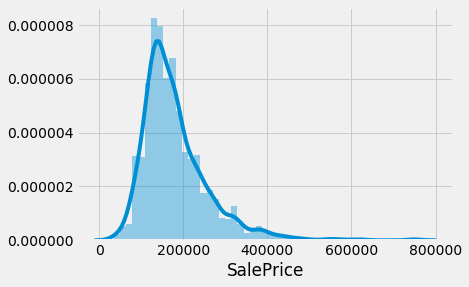

In [32]:
# Distribution of 'SalePrice' variable

sb.distplot(housing['SalePrice'])
plt.show();

- **Observations:**
- 'SalePrice' variable has skewness in its distribution due to outliers, it is right skewed
- Need to perform power transform in order to make the distribution look more gaussian
- We will perform power transform to the variable in the 5. Pre-processing step

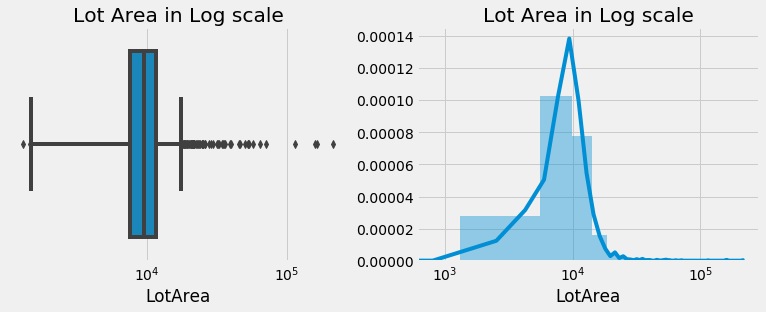

In [33]:
# Plotting 'LotArea'

plt.figure(figsize=(12,4))
plt.subplot(121)
sb.boxplot(housing['LotArea'])
plt.xscale('log')
plt.title('Lot Area in Log scale')

plt.subplot(122)
sb.distplot(housing['LotArea'])
plt.xscale('log')
plt.title('Lot Area in Log scale')
plt.show();

- Q1 = 25 percentile, Q2 = 50 percentile, Q3 = 75 percentile, IQR = Q3 - Q2
- Commonly used metric for outlier detection is IQR 1.5 rule
- The IOR 1.5 rule is that data point less than lower limit i.e (Q1 - IQR\*1.5) and more than upper limit i.e ( Q3 + IQR\*1.5) are considered to be an outlier

- **Observations:**
- Used logscale on X-axis for better visualization
- In the boxplot we can see the outliers above and below the upper and lower whiskers respectively
- There are lot of outliers above the upper whisker
- Looking at the plots we can see that preference is for large area size
- In the boxplot we can see that median is around 10,000 sq feet, 50% of the properties around the median range within the IQR
- IN the displot we can see that the peak is around 10,000 sq feet, large number of houses have property area around it
- In the displot we can see that few properties have very large area, this is skewing the distribution

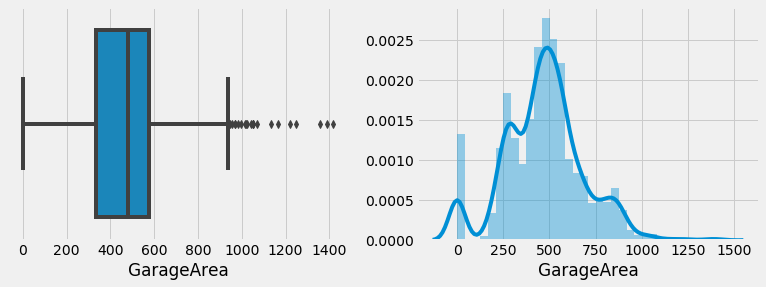

In [34]:
# Plotting 'GarageArea'

plt.figure(figsize=(12,4))
plt.subplot(121)
sb.boxplot(housing['GarageArea'])

plt.subplot(122)
sb.distplot(housing['GarageArea'])

plt.show();

- **Observations:**
- In boxplot, There are lot of outlers above the upper whiskers
- In boxplot, 50% of the properties have garage area between 300 sq feet and 600 sq feet
- In boxplot, spread of the data points below the median is more than above the median within the IQR
- In distplot we can see that the distribution is bi-modal, a hump is at 0, which means there are properties with no garage
- In displot plot we can see that the peak of distribution is at 500 sq feet, that means there are more number of properties with area around 500 sq feet
- There are properties with very large garage size, which means they might be on the outskirts of the cities

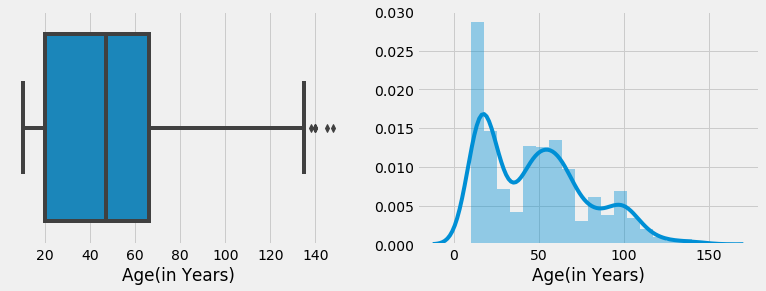

In [35]:
# Plotting 'Age(in Years)'

plt.figure(figsize=(12,4))
plt.subplot(121)
sb.boxplot(housing['Age(in Years)'])

plt.subplot(122)
sb.distplot(housing['Age(in Years)'])

plt.show();

- **Observations:**
- In boxplot, There are outlers above the upper whiskers
- In boxplot, 50% of the properties have age between 20 yrs and 70 yrs
- In boxplot, spread of the data points below the median is more than above the median within the IQR
- In distplot we can see that the distribution is multi-modal, a hump is at 20 yrs, a hump is at 60 yrs
- There are properties which are very old like above 150 yrs

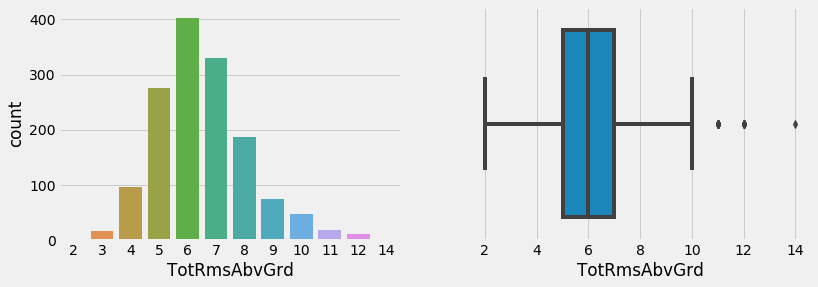

In [36]:
# Plotting 'TotRmsAbvGrd'

plt.figure(figsize=(12,4))
plt.subplot(121)
sb.countplot(housing['TotRmsAbvGrd'])

plt.subplot(122)
sb.boxplot(housing['TotRmsAbvGrd'])
plt.show();

- **Observations:**
- From countplot we can see that the number of properties with total rooms 6 is 400
- From countplot we can see that the number of properties with total rooms 6 is around 320, which is second highest count
- Count plot has distribution similar to normal distribution
- From boxplot we can see that 50% of the properties have total rooms between 5 and 7
- From boxplot we can also see that there are outliers above upper whisker
- In boxplot spread of data points above and below thw median is equal with IQR

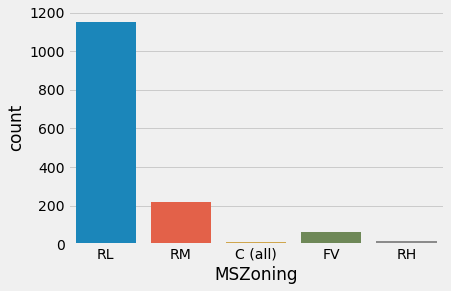

In [37]:
# Plotting 'MSZoning'

sb.countplot(housing['MSZoning'])

plt.show();  

- **Observations:**
- From countplot we can see that the number of properties in 'RL', which is residential with low density is around 1200
- From countplot we can see that the number of properties in 'RL' is very high, second highest being 'RM', residential medium density
- From countplot we can see that the number of properties in 'HL', which is high density areas, is very low

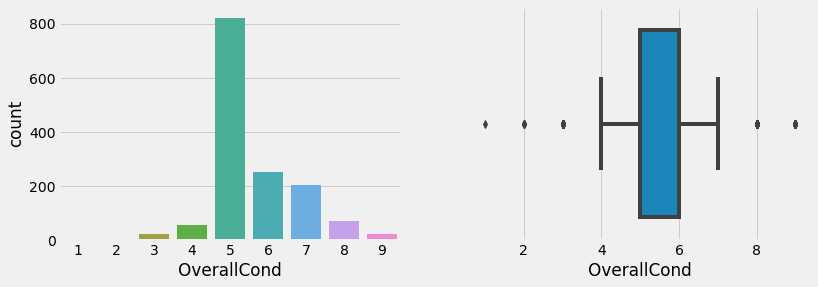

In [38]:
# Plotting 'OverallCond'

plt.figure(figsize=(12,4))
plt.subplot(121)
sb.countplot(housing['OverallCond'])

plt.subplot(122)
sb.boxplot(housing['OverallCond'])
plt.show();

- **Observations:**
- Please note that the rating is between 1 to 10, 1 being 'Very Poor' and 10 being 'Very Excellent'
- From countplot we can see that more than 800 properties have overall property condition as 'Average' i.e. rating of 5
- From countplot we can see that the number of properties with 'Excellent' overall condition which is rating 9, is very less
- Count plot looks like normal distribution with the peak at rating 5, which is 'Average'
- From boxplot we can see that 50% of the properties are between below average and average range
- From boxplot we can also see that there are outliers above upper whisker and lower whisker
- In boxplot we can see that large number of data points have overall condition of 'Average' i.e. rating 5

### Bivariate Analysis

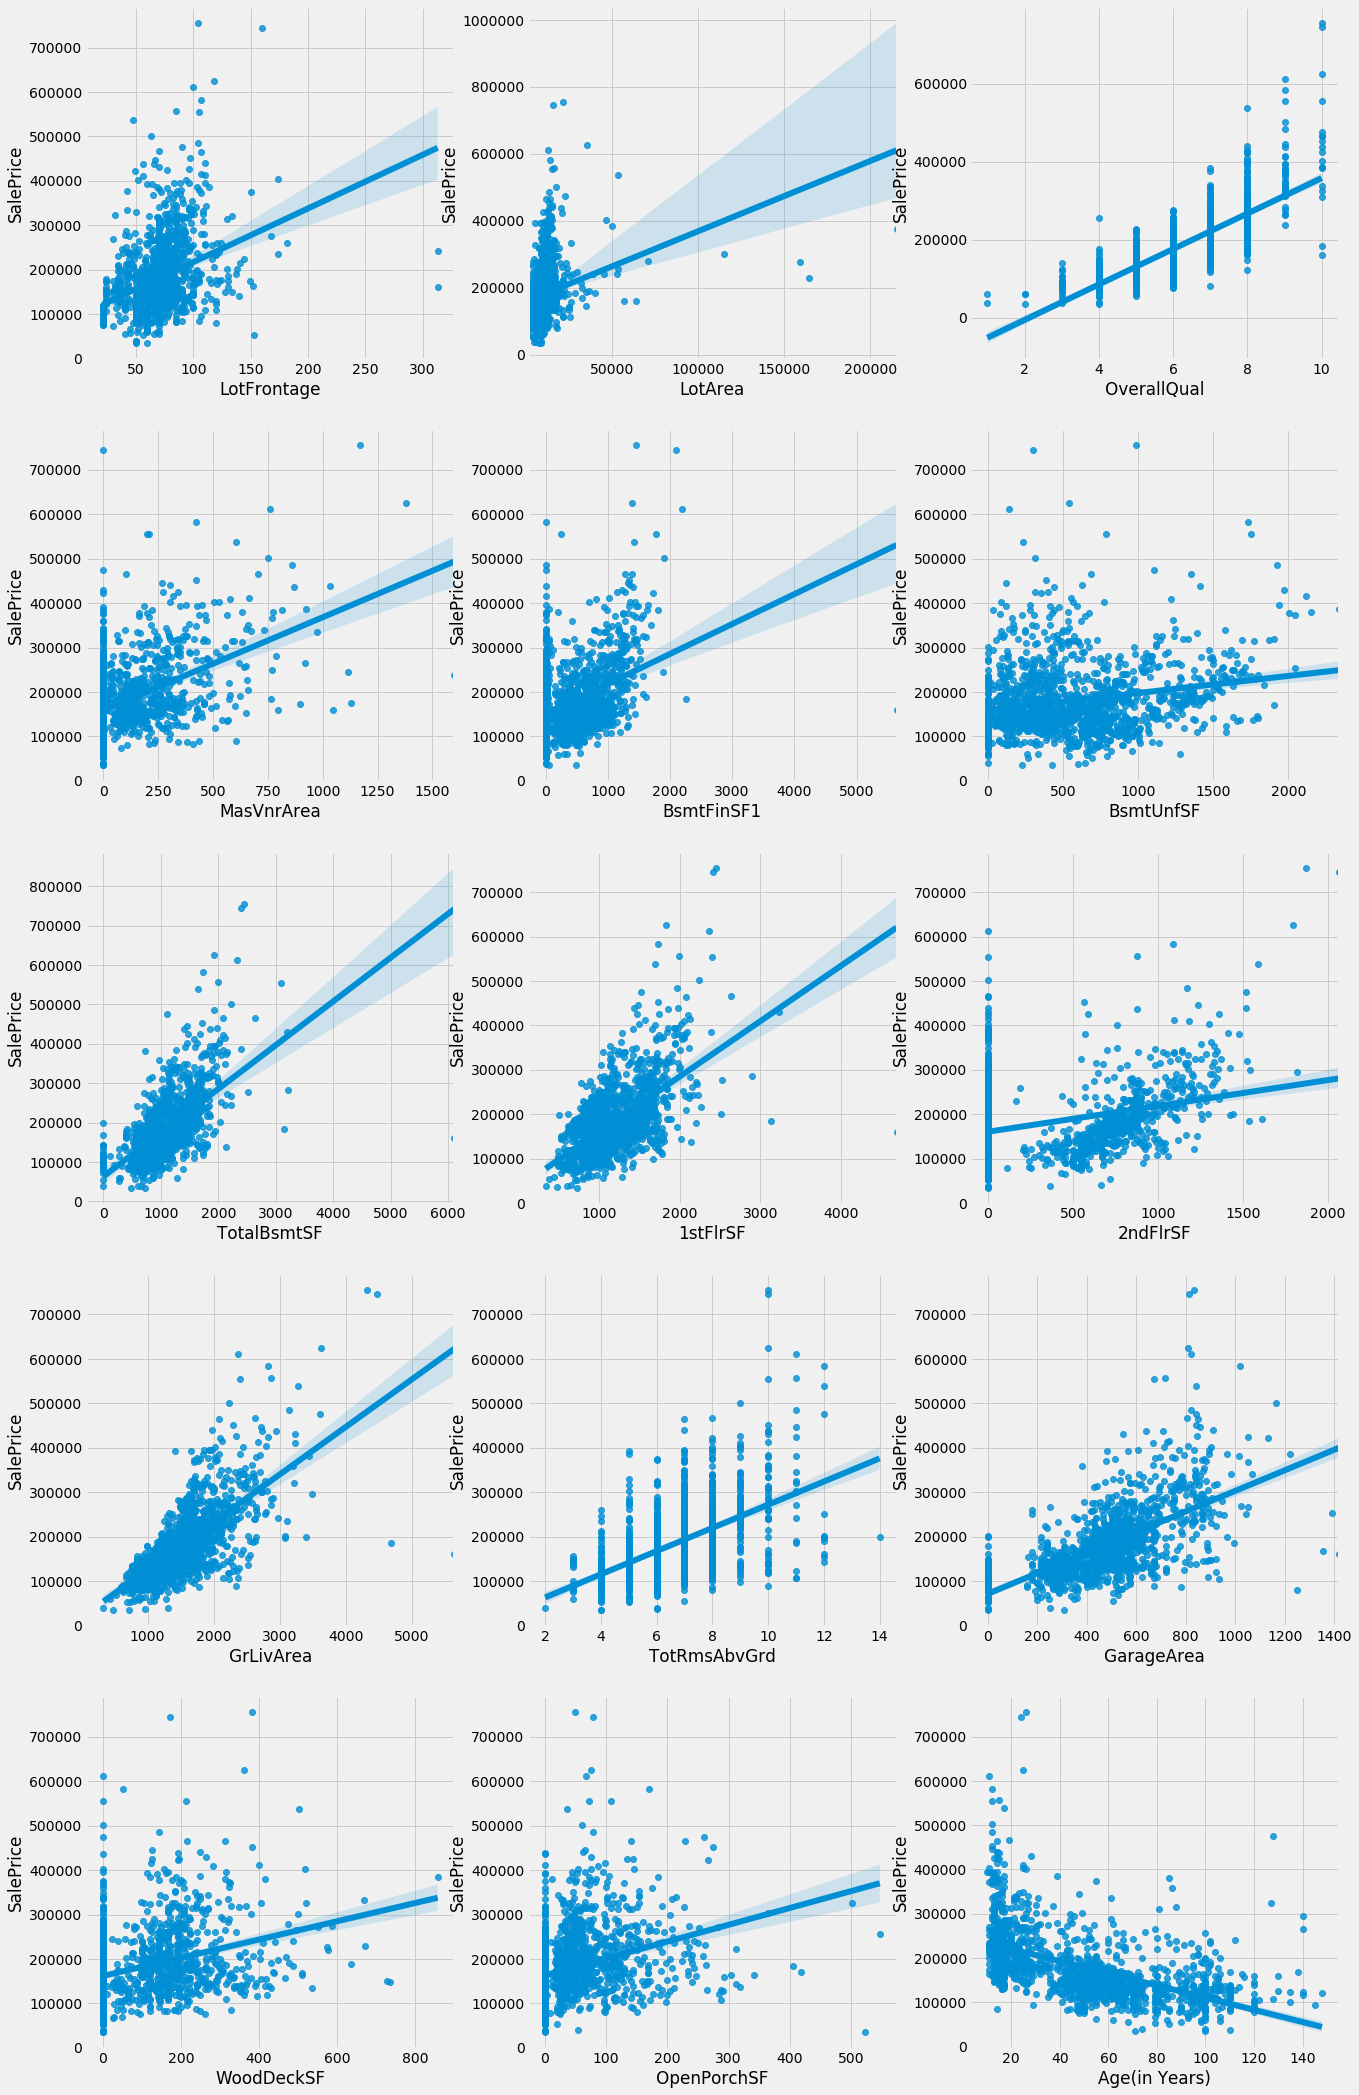

In [39]:
# Plotting Regplot for numerical variables

plt.figure(figsize=(20,35))
num_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 
             'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
             'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Age(in Years)']

for i in enumerate(num_cols):
    plt.subplot(5,3,i[0]+1)
    sb.regplot(x=housing[i[1]], y=housing['SalePrice'])


plt.show();


- **Observation:**
- **`SalePrice vs. LotFrontage`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 100 linear feet             'LotFrontage'. It seems people prefer 'LotFrontage' of 100 or less. 
- There are data points which have 'SalePrice' of above 600000, they seems to be outliers. 
- Also there are outliers with 'LotFrontage' of above 300 linear feet and 'SalePrice' of below 300000
- **`SalePrice vs. LotArea`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 25000 square feet 'LotArea'. It seems people prefer 'LotArea' of 25000 square feet or less. 
- There are data points which have 'SalePrice' of above 600000, they seems to be outliers
- Also there are outliers with 'LotArea' of above 150000 square feet and 'SalePrice' of below 400000
- **`SalePrice vs. OverallQual`:** 
- There is a positive linear relationship, as 'OverallQual' increases the price of property also increases. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers
- **`SalePrice vs. MasVnrArea`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 500 square feet for 'MasVnrArea'. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers. 
- Also there are data points with 0 'MasVnrArea' or no 'MasVnrArea'
- Also there are outliers with 'MasVnrArea' of above 1500 square feet and 'SalePrice' of below 300000
- **`SalePrice vs. BsmtFinSF1`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 1500 square feet for 'BsmtFinSF1'. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers. 
- Also there are data points with 0 'BsmtFinSF1' or no 'BsmtFinSF1'
- Also there are outliers with 'BsmtFinSF1' of above 5000 square feet and 'SalePrice' of below 200000
- **`SalePrice vs. BsmtUnfSF`:** 
- There is no linear relationship as such, the data points are spread out for this variable although horizontally, however curves up a bit around 1700 square feet. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers
- **`SalePrice vs. TotalBsmtSF`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 2000 square feet 'TotalBsmtSF', it seems people prefer 'TotalBsmtSF' of 2000 or less. 
- There are data points which have 'SalePrice' of above 600000, they seems to be outliers
- Also there are outliers with 'TotalBsmtSF' of above 6000 square feet and 'SalePrice' of below 200000
- **`SalePrice vs. 1stFlrSF`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 2000 square feet '1stFlrSF', it seems people prefer '1stFlrSF' of 2000 or less. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers
- Also there are outliers with '1stFlrSF' of above 4000 square feet and 'SalePrice' of below 200000
- **`SalePrice vs. 2ndFlrSF`:** 
- There is a bit of positive linear relationship, the data points however curve up a bit after 1400 square feet. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers
- **`SalePrice vs. GrLivArea`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 2500 square feet 'GrLivArea'
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers
- Also there are outliers with 'GrLivArea' of above 4000 square feet and 'SalePrice' of below 200000
- **`SalePrice vs. TotRmsAbvGrd`:** 
- There is a positive linear relationship, as 'OverallQual' increases the price of property also increases. 
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers
- Also there is an outlier at 'TotRmsAbvGrd' of 14 rooms and 'SalePrice' of 200000
- **`SalePrice vs. GarageArea`:** 
- There is a positive linear relationship and the data points are spread out.
- There are data points which have 'SalePrice' of above 500000, they seems to be outliers.
- Also there are outliers with 'LotFrontage' of above 1200 square feet and 'SalePrice' of below 300000
- **`SalePrice vs. WoodDeckSF`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 350 square feet for 'WoodDeckSF'. 
- There are data points which have 'SalePrice' of above 400000, they seems to be outliers. There are outliers with 'WoodDeckSF' of above 700 square feet and 'SalePrice' of below 200000. 
- Also there are data points with 0 'WoodDeckSF' or no 'WoodDeckSF'
- **`SalePrice vs. OpenPorchSF`:** 
- There is a positive linear relationship,however, most of the data points are concetrated below 150 square feet for 'OpenPorchSF'. 
- There are data points which have 'SalePrice' of above 400000, they seems to be outliers. 
- There are outliers with 'OpenPorchSF' of above 500 square feet and 'SalePrice' of below 300000.
- Also there are data points with 0 'OpenPorchSF' or no 'OpenPorchSF'
- **`SalePrice vs. Age(in Years)`:** 
- There is a negative linear relationship which is expected, as age of a property increases the vale of that property goes down. 
- There are data points which have 'SalePrice' of above 400000, they seems to be outliers. 
- Also there are outliers with 'LotFrontage' between range 120 and 140 years and 'SalePrice' between range 250000 and 500000

# 5. Data Pre-processing

- **Performing Power Transform on the 'SalePrice' variable**

In [40]:
# Performing power transform on numerical variables

pt = PowerTransformer()
housing[['SalePrice']] = pd.DataFrame(pt.fit_transform(housing[['SalePrice']]))
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age(in Years)
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,0.571155,17
1,20,RL,80.0,9600,Reg,Others,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0.227627,44
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0.741869,19
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,-0.425386,105
4,60,RL,84.0,14260,IR1,Others,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,1.015293,20


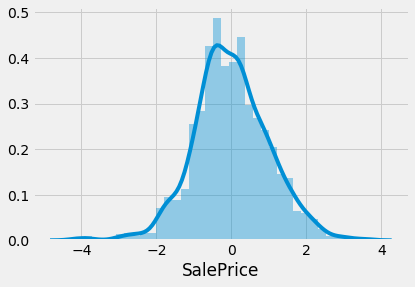

In [41]:
# Distribution of 'SalePrice' variable after performing power transform

sb.distplot(housing['SalePrice'])
plt.show();

- **Observation:**
- As we can see the distribution for 'SalePrice' variable looks more gaussian after performing power transform
- The distribution is centered at zero and standard deviation of one

- **Ordinal encoding and Dummy variable creation**

- **Ordinal Encoding**

In [42]:
# Making list of categories in a variable to use it in Ordinal encoding

ls = ['IR3', 'IR2', 'IR1', 'Reg']
eq = ['Fa', 'TA', 'Gd', 'Ex']
bq = ['No Basement', 'Fa', 'TA', 'Gd', 'Ex']
be = ['No Basement', 'No', 'Mn', 'Av', 'Gd']
bft1 = ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
hq = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
kq = ['Fa', 'TA', 'Gd', 'Ex']
fq = ['No Fireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
gf = ['No Garage', 'Unf', 'RFn', 'Fin']

In [43]:
# Initiating and fitting the Ordinal encoder

oe = OrdinalEncoder(categories=[ls,eq,bq,be,bft1,hq,kq,fq,gf])
oe.fit(housing[['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',\
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']])

OrdinalEncoder(categories=[['IR3', 'IR2', 'IR1', 'Reg'],
                           ['Fa', 'TA', 'Gd', 'Ex'],
                           ['No Basement', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Basement', 'No', 'Mn', 'Av', 'Gd'],
                           ['No Basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ',
                            'GLQ'],
                           ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Fa', 'TA', 'Gd', 'Ex'],
                           ['No Fireplace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['No Garage', 'Unf', 'RFn', 'Fin']],
               dtype=<class 'numpy.float64'>)

In [44]:
# Transforming the variables into ordinal

housing[['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',\
                   'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']] = oe.transform(housing[['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',\
                                                                                                           'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']])

In [45]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age(in Years)
0,60,RL,65.0,8450,3.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,2.0,PConc,3.0,1.0,6.0,706,150,856,4.0,856,854,1710,1,2,1,3,2.0,8,0,0.0,Attchd,2.0,2,548,0,61,0.571155,17
1,20,RL,80.0,9600,3.0,Others,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,1.0,CBlock,3.0,4.0,5.0,978,284,1262,4.0,1262,0,1262,0,2,0,3,1.0,6,1,3.0,Attchd,2.0,2,460,298,0,0.227627,44
2,60,RL,68.0,11250,2.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,2.0,PConc,3.0,2.0,6.0,486,434,920,4.0,920,866,1786,1,2,1,3,2.0,6,1,3.0,Attchd,2.0,2,608,0,42,0.741869,19
3,70,RL,60.0,9550,2.0,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,1.0,BrkTil,2.0,1.0,5.0,216,540,756,3.0,961,756,1717,1,1,0,3,2.0,7,1,4.0,Detchd,1.0,3,642,0,35,-0.425386,105
4,60,RL,84.0,14260,2.0,Others,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,2.0,PConc,3.0,3.0,6.0,655,490,1145,4.0,1145,1053,2198,1,2,1,4,2.0,9,1,3.0,Attchd,2.0,3,836,192,84,1.015293,20


- **Dummy Encoding**

In [46]:
# Performing dummy encoding on categorical variables

dummy = pd.get_dummies(housing[['MSZoning', 'LotConfig', 'HouseStyle', 'Neighborhood', 'RoofStyle', 'Exterior1st', 
                                   'Exterior2nd','MasVnrType', 'Foundation', 'GarageType']])
dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_Inside,LotConfig_Others,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


In [47]:
# Concatinatng power_data and dummy

housing = pd.concat([housing,dummy],axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age(in Years),MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_Inside,...,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Others,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_Others,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others
0,60,RL,65.0,8450,3.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,2.0,PConc,3.0,1.0,6.0,706,150,856,4.0,856,854,1710,1,2,1,3,2.0,8,0,0.0,Attchd,2.0,2,548,0,61,0.571155,17,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
1,20,RL,80.0,9600,3.0,Others,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,1.0,CBlock,3.0,4.0,5.0,978,284,1262,4.0,1262,0,1262,0,2,0,3,1.0,6,1,3.0,Attchd,2.0,2,460,298,0,0.227627,44,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
2,60,RL,68.0,11250,2.0,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,2.0,PConc,3.0,2.0,6.0,486,434,920,4.0,920,866,1786,1,2,1,3,2.0,6,1,3.0,Attchd,2.0,2,608,0,42,0.741869,19,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,70,RL,60.0,9550,2.0,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,1.0,BrkTil,2.0,1.0,5.0,216,540,756,3.0,961,756,1717,1,1,0,3,2.0,7,1,4.0,Detchd,1.0,3,642,0,35,-0.425386,105,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,2.0,Others,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,2.0,PConc,3.0,3.0,6.0,655,490,1145,4.0,1145,1053,2198,1,2,1,4,2.0,9,1,3.0,Attchd,2.0,3,836,192,84,1.015293,20,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


In [48]:
# Creating list to drop the columns

drop_cols = ['MSZoning_C (all)', 'LotConfig_Others', 'HouseStyle_Others', 'Neighborhood_Blueste', 'RoofStyle_Others',
             'Exterior1st_Stucco', 'Exterior2nd_AsbShng', 'MasVnrType_BrkCmn', 'Foundation_Others', 'GarageType_Others', 
              'MSZoning', 'LotConfig', 'HouseStyle', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd','MasVnrType',
             'Foundation', 'GarageType']

In [49]:
# Dropping unnecessary variables

housing.drop(labels=drop_cols, axis=1, inplace=True)
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age(in Years),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_Inside,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage
0,60,65.0,8450,3.0,7,5,196.0,2.0,3.0,1.0,6.0,706,150,856,4.0,856,854,1710,1,2,1,3,2.0,8,0,0.0,2.0,2,548,0,61,0.571155,17,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,20,80.0,9600,3.0,6,8,0.0,1.0,3.0,4.0,5.0,978,284,1262,4.0,1262,0,1262,0,2,0,3,1.0,6,1,3.0,2.0,2,460,298,0,0.227627,44,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,60,68.0,11250,2.0,7,5,162.0,2.0,3.0,2.0,6.0,486,434,920,4.0,920,866,1786,1,2,1,3,2.0,6,1,3.0,2.0,2,608,0,42,0.741869,19,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
3,70,60.0,9550,2.0,7,5,0.0,1.0,2.0,1.0,5.0,216,540,756,3.0,961,756,1717,1,1,0,3,2.0,7,1,4.0,1.0,3,642,0,35,-0.425386,105,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
4,60,84.0,14260,2.0,8,5,350.0,2.0,3.0,3.0,6.0,655,490,1145,4.0,1145,1053,2198,1,2,1,4,2.0,9,1,3.0,2.0,3,836,192,84,1.015293,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0


In [50]:
# Checking the shape of resultant dataframe

housing.shape

(1460, 99)

# 6. Train-Test split, Scaling and Feature Selection

- **Train-Test split**

In [51]:
# Bifurcating features and target variable

X = housing.drop('SalePrice', axis=1)
y = housing['SalePrice']

In [52]:
X.shape, y.shape

((1460, 98), (1460,))

In [53]:
# Performing train, test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Checking shape of the train and test data sets

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 98), (438, 98), (1022,), (438,))

- **Feature Scaling**

In [55]:
# Creatin copy of the variables to avoid 'setting with copy warning'

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [56]:
# Creating list of variables to scale

to_scale = ['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','HeatingQC', 'KitchenQual', 'FireplaceQu', 
            'GarageFinish', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
            'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
            'OpenPorchSF', 'Age(in Years)']

In [57]:
# Initiating standard scaler, fitting and transforming the train data set

sc = StandardScaler()
X_train_scaled[to_scale] = sc.fit_transform(X_train_scaled[to_scale])

In [58]:
# Performing standard transform on the test data set

X_test_scaled[to_scale] = sc.transform(X_test_scaled[to_scale])

In [59]:
# Checking the head of the train data set after scaling

X_train_scaled.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Age(in Years),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_Inside,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage
135,-0.868950,0.420654,-0.030504,0.710834,0.636031,0.392266,1.060186,-0.685209,-0.652004,-0.589840,-1.214801,-0.970484,1.643785,0.546130,-0.150315,1.315652,-0.802294,0.287835,-0.814295,0.767840,-0.758517,0.135175,-0.763248,0.279234,0.594240,1.208878,-0.812874,0.296063,0.253813,0.003427,-0.715974,0.032378,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1452,2.882618,-1.533770,-0.624365,0.710834,-0.823057,-0.508624,-0.146525,-0.685209,0.612413,2.209619,1.154524,0.219303,-1.281383,-1.146608,-0.150315,-0.251022,-0.802294,-0.861565,1.112115,-1.069941,-0.758517,-1.098297,-0.763248,-0.948194,-0.943262,-1.000283,1.426363,0.296063,0.229814,-0.741099,-0.311187,-1.106434,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
762,0.068942,0.073201,-0.185924,0.710834,0.636031,-0.508624,-0.610644,-0.685209,0.612413,0.343313,1.154524,-0.918281,0.360659,-0.679260,0.887671,-1.042064,0.973582,0.033459,-0.814295,0.767840,1.265515,0.135175,0.751392,0.279234,-0.943262,-1.000283,-0.812874,0.296063,0.656997,0.542828,-0.065423,-1.236584,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
932,-0.868950,0.594381,0.081645,-0.970815,2.095118,-0.508624,1.141407,2.816208,1.876830,-0.589840,-1.214801,-0.970484,2.991965,1.890034,0.887671,1.888387,-0.802294,0.708025,-0.814295,0.767840,-0.758517,0.135175,2.266031,0.892948,0.594240,1.208878,1.426363,1.665189,1.492165,-0.741099,2.045255,-1.138972,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
435,0.068942,-1.186317,-0.006927,-2.652464,0.636031,0.392266,-0.610644,1.065500,0.612413,1.276466,1.154524,-0.133065,-1.124357,-0.583107,0.887671,-0.880260,1.089252,0.248265,1.112115,0.767840,1.265515,0.135175,0.751392,-0.334480,0.594240,0.656587,0.306745,0.296063,0.349809,0.459259,0.165884,-0.813597,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0


- **Using `RFE` for feature selection**

In [60]:
# Using 'LinearRegression' and 'RFE' for feature selection - Selecting 25 features

linreg = LinearRegression()
rfe = RFE(linreg,n_features_to_select=25)
rfe = rfe.fit(X_train_scaled,y_train)

In [61]:
# Creating dataframe of those selected features

features = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
features = pd.DataFrame(features, columns=['Feature', 'Support','Ranking'])
features = features.sort_values(by=['Support','Ranking'],ascending=[False,True])
features

,Feature,Support,Ranking
4,OverallQual,True,1
5,OverallCond,True,1
17,GrLivArea,True,1
27,GarageCars,True,1
31,Age(in Years),True,1
32,MSZoning_FV,True,1
33,MSZoning_RH,True,1
34,MSZoning_RL,True,1
35,MSZoning_RM,True,1
40,HouseStyle_2Story,True,1


In [62]:
# Creating dataframe of top 25 features

features = features.nlargest(25,columns=['Support'])
feat_col = features.Feature
X_train_scaled[feat_col].head()

,OverallQual,OverallCond,GrLivArea,GarageCars,Age(in Years),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,HouseStyle_2Story,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_BrkFace,Exterior2nd_Others,GarageType_Attchd
135,0.636031,0.392266,0.287835,0.296063,0.032378,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1452,-0.823057,-0.508624,-0.861565,0.296063,-1.106434,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
762,0.636031,-0.508624,0.033459,0.296063,-1.236584,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
932,2.095118,-0.508624,0.708025,1.665189,-1.138972,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
435,0.636031,0.392266,0.248265,0.296063,-0.813597,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [63]:
# Checking those 25 features

print(feat_col.values,end='')

['OverallQual' 'OverallCond' 'GrLivArea' 'GarageCars' 'Age(in Years)'
 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM'
 'HouseStyle_2Story' 'Neighborhood_ClearCr' 'Neighborhood_CollgCr'
 'Neighborhood_Crawfor' 'Neighborhood_Gilbert' 'Neighborhood_NoRidge'
 'Neighborhood_NridgHt' 'Neighborhood_Somerst' 'Neighborhood_StoneBr'
 'Neighborhood_Timber' 'Neighborhood_Veenker' 'RoofStyle_Gable'
 'RoofStyle_Hip' 'Exterior1st_BrkFace' 'Exterior2nd_Others'
 'GarageType_Attchd']

# 7(A). Model Building using `Ridge`

- **Using default parameters**

In [64]:
# Filtering those 25 variables we got after RFE and assigning them to 'X_train_scaled' and 'X_test_scaled'

X_train_scaled = X_train_scaled[feat_col]
X_test_scaled = X_test_scaled[feat_col]

In [65]:
# Initiating and fitting ridge to the train data set

ridge = Ridge()

ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [66]:
# Predictiong Train data set

y_train_pred_rid = ridge.predict(X_train_scaled)

# 7(B). Model Evaluation for `Ridge`

- **Model evaluation of default parameters**

In [67]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_train, y_train_pred_rid), 2))

R-Square for train data set is:  0.86


In [68]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_train, y_train_pred_rid), 4))

Negative Mean Absolute Error for train data set is:  0.2606


In [69]:
# Finding residual for after the train data set prediction

train_res_rid = y_train - y_train_pred_rid
train_res_rid[:10]

135    -0.325462
1452    0.347146
762     0.127554
932     0.349624
435     0.032308
629     0.221741
1210    0.154892
1118    0.061893
1084    0.216258
158     0.304727
Name: SalePrice, dtype: float64

### Finding best lambda/alpha for `Ridge` using `GridSearchCV`

In [70]:
# Initaiating the ridge

ridge_gs = Ridge(random_state=42)

# Hyper-parameter tuning with various lambda/alpha values

param = {'alpha':[0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}

# Initiating Repeated KFolds

kfolds = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

# Initiating the GridSearch

gs_search_rid = GridSearchCV(estimator=ridge_gs,
            param_grid=param,
            cv=kfolds,
            n_jobs=-1, verbose=1,
            scoring='neg_mean_absolute_error', return_train_score=True)

# Fitting the GridSearch to the train data set

gs_search_rid.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 32 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    6.7s finished


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6,
                                   7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                   55, 60, 65, 70, 75, 80, 85, 90, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

- **Model evaluation of GridSearchCV parameter lambda**

In [71]:
# Checking best parameter(lambda) according to the grid seach

print(f'The best lambda is {gs_search_rid.best_params_}')

The best lambda is {'alpha': 6}


In [72]:
# Creating a data frame out of grid search results

gs_ridge_results = pd.DataFrame(gs_search_rid.cv_results_)
gs_ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,...,split52_train_score,split53_train_score,split54_train_score,split55_train_score,split56_train_score,split57_train_score,split58_train_score,split59_train_score,split60_train_score,split61_train_score,split62_train_score,split63_train_score,split64_train_score,split65_train_score,split66_train_score,split67_train_score,split68_train_score,split69_train_score,split70_train_score,split71_train_score,split72_train_score,split73_train_score,split74_train_score,split75_train_score,split76_train_score,split77_train_score,split78_train_score,split79_train_score,split80_train_score,split81_train_score,split82_train_score,split83_train_score,split84_train_score,split85_train_score,split86_train_score,split87_train_score,split88_train_score,split89_train_score,split90_train_score,split91_train_score,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.004938,0.005694,0.002459,0.004433,0.0001,{'alpha': 0.0001},-0.287054,-0.260279,-0.270229,-0.258998,-0.254607,-0.261622,-0.229033,-0.310497,-0.277145,-0.289003,-0.309178,-0.271369,-0.327564,-0.245203,-0.241798,-0.277833,-0.268520,-0.248770,-0.262361,-0.252658,-0.246725,-0.292164,-0.278342,-0.224716,-0.256517,-0.291474,-0.293323,-0.251197,-0.293336,-0.283011,-0.262564,-0.240734,-0.284809,-0.289840,-0.251217,-0.299384,-0.310871,-0.272801,-0.242836,-0.241448,-0.291163,-0.303723,-0.273589,-0.261783,...,-0.260811,-0.262048,-0.263092,-0.253493,-0.260637,-0.263637,-0.255631,-0.261920,-0.261233,-0.262292,-0.258998,-0.253502,-0.266192,-0.265905,-0.261717,-0.261391,-0.257894,-0.259523,-0.250985,-0.264215,-0.257969,-0.253304,-0.264361,-0.263591,-0.266119,-0.263821,-0.262515,-0.261638,-0.255956,-0.262903,-0.261217,-0.258022,-0.259482,-0.263428,-0.261910,-0.259496,-0.262972,-0.265198,-0.266597,-0.260097,-0.259449,-0.257106,-0.263510,-0.263581,-0.261960,-0.264630,-0.252255,-0.259223,-0.260874,0.003667
1,0.004645,0.004946,0.001745,0.003614,0.001,{'alpha': 0.001},-0.287054,-0.260280,-0.270229,-0.258987,-0.254603,-0.261625,-0.229038,-0.310486,-0.277142,-0.289002,-0.309178,-0.271369,-0.327563,-0.245193,-0.241797,-0.277833,-0.268514,-0.248763,-0.262361,-0.252655,-0.246726,-0.292111,-0.278325,-0.224715,-0.256519,-0.291469,-0.293324,-0.251198,-0.293336,-0.283012,-0.262563,-0.240732,-0.284816,-0.289829,-0.251217,-0.299384,-0.310870,-0.272800,-0.242835,-0.241447,-0.291154,-0.303721,-0.273573,-0.261770,...,-0.260810,-0.262046,-0.263090,-0.253493,-0.260637,-0.263635,-0.255629,-0.261919,-0.261231,-0.262291,-0.258996,-0.253501,-0.266191,-0.265903,-0.261716,-0.261390,-0.257892,-0.259522,-0.250984,-0.264215,-0.257968,-0.253303,-0.264359,-0.263590,-0.266117,-0.263819,-0.262513,-0.261638,-0.255955,-0.262901,-0.261215,-0.258021,-0.259482,-0.263427,-0.261908,-0.259495,-0.262971,-0.265196,-0.266596,-0.260096,-0.259448,-0.257104,-0.263509,-0.263581,-0.261958,-0.264629,-0.252254,-0.259223,-0.260872,0.003667
2,0.005205,0.007327,0.001258,0.004236,0.01,{'alpha': 0.01},-0.287057,-0.260288,-0.270226,

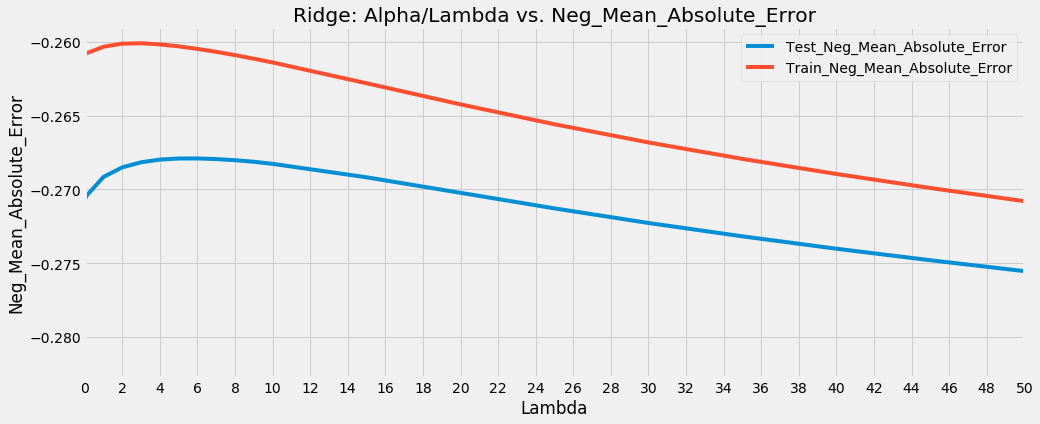

In [73]:
# Plotting Lambda vs. Neg_Mean_Square_Error for Train score and Test score

plt.figure(figsize=(15,6))
plt.plot(gs_ridge_results['param_alpha'], gs_ridge_results['mean_test_score'])
plt.plot(gs_ridge_results['param_alpha'], gs_ridge_results['mean_train_score'])
plt.xlabel('Lambda')
plt.xticks(ticks=range(0,51,2))
plt.xlim([0,50])
plt.ylabel('Neg_Mean_Absolute_Error')
plt.title('Ridge: Alpha/Lambda vs. Neg_Mean_Absolute_Error')
plt.legend(['Test_Neg_Mean_Absolute_Error', 'Train_Neg_Mean_Absolute_Error'], loc='upper right')
plt.show();

- ***Observations:***
- The Above graph is related to `Ridge`
- Used limited range i.e. till 50 for better visualization
- Optimal value as per grid search is `alpha/lambda=6`
- We can see that the test `Neg_Mean_Absolute_Error` increases as lambda value increase till the point where `lambda=6` after that it keeps decreasing
- Similar is the case for train `Neg_Mean_Absolute_Error`, it keeps increasing till the point where lambda=3 after that it keeps decreasing

# 7(C). Predicting the Test data set with best lambda, `lambda = 6.0`

In [74]:
# Initiating and fitting ridge to the train data set

best_ridge = Ridge(alpha=6.0)

best_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=6.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Predicting the Test data set

In [75]:
# Predictiong Test data set

y_test_pred_rid = best_ridge.predict(X_test_scaled)

In [76]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_test, y_test_pred_rid), 2))

R-Square for train data set is:  0.87


In [77]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_test, y_test_pred_rid), 4))

Negative Mean Absolute Error for train data set is:  0.2573


In [78]:
imp_feat_rid = pd.DataFrame(best_ridge.coef_,X_test_scaled.columns).reset_index()
imp_feat_rid.columns=['Features', 'Importance']
imp_feat_rid.sort_values(by='Importance', ascending=False, inplace=True)
imp_feat_rid

,Features,Importance
2,GrLivArea,0.354581
17,Neighborhood_StoneBr,0.346779
10,Neighborhood_ClearCr,0.337303
12,Neighborhood_Crawfor,0.325294
15,Neighborhood_NridgHt,0.317931
0,OverallQual,0.290172
14,Neighborhood_NoRidge,0.235051
18,Neighborhood_Timber,0.221359
22,Exterior1st_BrkFace,0.208455
5,MSZoning_FV,0.206970


- ***Observations:***
- The top 5 variables for `Ridge` after using optimal lambda of 6 are `GrLivArea=0.35`, `Neighborhood_StoneBr=0.34`, `Neighborhood_ClearCr=0.33`, `Neighborhood_Crawfor=0.32` and `Neighborhood_NridgHt=0.31`

## Question 1. Performance of model when we double the lambda/alpha i.e. `aplha=12.0`

In [79]:
# Initiating and fitting ridge to the train data set

ridge_12 = Ridge(alpha=12.0)

ridge_12.fit(X_train_scaled, y_train)

Ridge(alpha=12.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
# Predictiong Train data set

y_test_pred_rid_12 = ridge_12.predict(X_test_scaled)

In [81]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_test, y_test_pred_rid_12), 2))

R-Square for train data set is:  0.87


In [82]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_test, y_test_pred_rid_12), 4))

Negative Mean Absolute Error for train data set is:  0.2593


In [83]:
imp_feat_rid_12 = pd.DataFrame(ridge_12.coef_,X_test_scaled.columns).reset_index()
imp_feat_rid_12.columns=['Features', 'Importance']
imp_feat_rid_12.sort_values(by='Importance', ascending=False, inplace=True)
imp_feat_rid_12

,Features,Importance
2,GrLivArea,0.351705
0,OverallQual,0.300629
12,Neighborhood_Crawfor,0.273698
10,Neighborhood_ClearCr,0.267668
17,Neighborhood_StoneBr,0.256005
15,Neighborhood_NridgHt,0.252026
22,Exterior1st_BrkFace,0.183173
3,GarageCars,0.179486
14,Neighborhood_NoRidge,0.170234
18,Neighborhood_Timber,0.166221


- ***Observations:***
- Above top 5 variables are after doubling the lambda value to `alpha/lambda=12`
- The top 5 variables for `Ridge` after using lambda of 12 are `GrLivArea=0.35`, `OverallQual=0.30`, `Neighborhood_Crawfor=0.27`, `Neighborhood_ClearCr=0.26` and `Neighborhood_StoneBr=0.25`

# 8(A). Model building using `Lasso`

- **Using default parameters**

In [84]:
# Initiating and fitting ridge to the train data set

lasso = Lasso()

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
# Predictiong Train data set

y_train_pred_laso = lasso.predict(X_train_scaled)

# 8(B). Model Evaluation for `Lasso`

- **Model evaluation of default parameters**

In [86]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_train, y_train_pred_laso), 2))

R-Square for train data set is:  0.0


In [87]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_train, y_train_pred_laso), 4))

Negative Mean Absolute Error for train data set is:  0.7666


In [88]:
# Finding residual for after the train data set prediction

train_res_laso = y_train - y_train_pred_laso
train_res_laso[:10]

135     0.109801
1452   -0.348920
762     0.636425
932     1.596866
435     0.599580
629     0.029454
1210    0.315741
1118   -0.437951
1084    0.295954
158     1.049855
Name: SalePrice, dtype: float64

### Finding best lambda/alpha for `Lasso` using `GridSearchCV`

In [89]:
# Initaiating the ridge

lasso_gs = Lasso(random_state=42)

# Hyper-parameter tuning with various lambda/alpha values

param = {'alpha':[0,0.00001,0.0001,0.0005,0.001,0.01,0.1,1,10]}

# Initiating Repeated KFolds

kfolds = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

# Initiating the GridSearch

gs_lasso = GridSearchCV(estimator=lasso_gs,
            param_grid=param,
            cv=kfolds,
            n_jobs=-1, verbose=1,
            scoring='neg_mean_absolute_error', return_train_score=True)

# Fitting the GridSearch to the train data set

gs_lasso.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 9 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    2.1s finished


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0, 1e-05, 0.0001, 0.0005, 0.001, 0.01, 0.1,
                                   1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

- **Model evaluation of GridSearchCV parameter lambda**

In [90]:
# Checking best parameter(lambda) according to the grid seach

print(f'The best lambda is {gs_lasso.best_params_}')

The best lambda is {'alpha': 0.001}


In [91]:
# Creating a data frame out of grid search results

gs_lasso_results = pd.DataFrame(gs_lasso.cv_results_)
gs_lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,...,split52_train_score,split53_train_score,split54_train_score,split55_train_score,split56_train_score,split57_train_score,split58_train_score,split59_train_score,split60_train_score,split61_train_score,split62_train_score,split63_train_score,split64_train_score,split65_train_score,split66_train_score,split67_train_score,split68_train_score,split69_train_score,split70_train_score,split71_train_score,split72_train_score,split73_train_score,split74_train_score,split75_train_score,split76_train_score,split77_train_score,split78_train_score,split79_train_score,split80_train_score,split81_train_score,split82_train_score,split83_train_score,split84_train_score,split85_train_score,split86_train_score,split87_train_score,split88_train_score,split89_train_score,split90_train_score,split91_train_score,split92_train_score,split93_train_score,split94_train_score,split95_train_score,split96_train_score,split97_train_score,split98_train_score,split99_train_score,mean_train_score,std_train_score
0,0.049188,0.016431,0.002263,0.003655,0,{'alpha': 0},-0.287054,-0.260279,-0.270229,-0.258999,-0.254608,-0.261622,-0.229033,-0.310499,-0.277145,-0.289004,-0.309178,-0.271369,-0.327564,-0.245205,-0.241798,-0.277833,-0.268521,-0.248771,-0.262361,-0.252658,-0.246725,-0.292170,-0.278344,-0.224716,-0.256517,-0.291475,-0.293323,-0.251197,-0.293336,-0.283011,-0.262564,-0.240734,-0.284809,-0.289842,-0.251217,-0.299383,-0.310871,-0.272801,-0.242836,-0.241448,-0.291164,-0.303723,-0.273590,-0.261784,...,-0.260811,-0.262048,-0.263092,-0.253493,-0.260637,-0.263637,-0.255631,-0.261920,-0.261234,-0.262292,-0.258998,-0.253502,-0.266193,-0.265905,-0.261717,-0.261392,-0.257894,-0.259523,-0.250985,-0.264216,-0.257969,-0.253304,-0.264361,-0.263591,-0.266119,-0.263821,-0.262515,-0.261638,-0.255956,-0.262903,-0.261217,-0.258022,-0.259482,-0.263428,-0.261910,-0.259496,-0.262972,-0.265198,-0.266597,-0.260097,-0.259449,-0.257106,-0.263511,-0.263581,-0.261960,-0.264631,-0.252255,-0.259223,-0.260874,0.003667
1,0.015730,0.007570,0.001588,0.002968,1e-05,{'alpha': 1e-05},-0.287058,-0.260289,-0.270206,-0.258863,-0.254514,-0.261675,-0.229140,-0.310382,-0.277066,-0.288915,-0.309174,-0.271353,-0.327576,-0.245105,-0.241788,-0.277819,-0.268404,-0.248646,-0.262319,-0.252571,-0.246768,-0.291767,-0.278101,-0.224689,-0.256545,-0.291355,-0.293337,-0.251217,-0.293272,-0.283031,-0.262544,-0.240671,-0.284932,-0.289668,-0.251215,-0.299423,-0.310826,-0.272773,-0.242817,-0.241397,-0.290755,-0.303680,-0.273388,-0.261598,...,-0.260784,-0.262001,-0.263050,-0.253471,-0.260605,-0.263595,-0.255599,-0.261895,-0.261199,-0.262260,-0.258947,-0.253478,-0.266153,-0.265865,-0.261679,-0.261354,-0.257847,-0.259488,-0.250947,-0.264193,-0.257939,-0.253273,-0.264322,-0.263553,-0.266085,-0.263777,-0.262466,-0.261613,-0.255915,-0.262860,-0.261181,-0.257997,-0.259462,-0.263399,-0.261863,-0.259469,-0.262937,-0.265153,-0.266570,-0.260060,-0.259410,-0.257070,-0.263470,-0.263552,-0.261917,-0.264596,-0.252234,-0.259202,-0.260839,0.003664
2,0.011605,0.004872,0.002122,0.002289,0.0001,{'alpha': 0.0001},-0.287185,-0.260404,-0.270110,-0.257

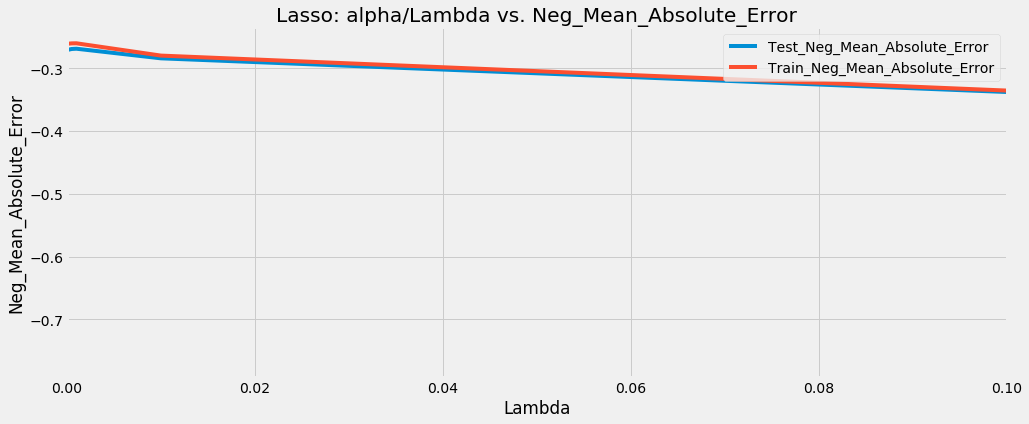

In [92]:
# Plotting Lambda vs. Neg_Mean_Square_Error for Train score and Test score

plt.figure(figsize=(15,6))
plt.plot(gs_lasso_results['param_alpha'], gs_lasso_results['mean_test_score'])
plt.plot(gs_lasso_results['param_alpha'], gs_lasso_results['mean_train_score'])
plt.xlabel('Lambda')
plt.xlim([0,0.1])
plt.ylabel('Neg_Mean_Absolute_Error')
plt.title('Lasso: alpha/Lambda vs. Neg_Mean_Absolute_Error')
plt.legend(['Test_Neg_Mean_Absolute_Error', 'Train_Neg_Mean_Absolute_Error'], loc='upper right')
plt.show();

- ***Observations:***
- The Above graph is related to `Lasso`
- Used this range as R-Square value becomes `0` for `lambda >=1`
- Optimal value as per grid search is `lambda=0.001`
- We can see that the test `Neg_Mean_Absolute_Error` is highest at `lambda=0.001` after that it keeps decreasing
- Similar is the case for train `Neg_Mean_Absolute_Error`, is highest at lambda=0.001 after that it keeps decreasing

# 8(C). Predicting the Test data set with best lambda, `lambda = 0.001`

In [93]:
# Initiating and fitting ridge to the train data set

best_lasso = Lasso(alpha=0.001)

best_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
# Predictiong Train data set

y_test_pred_laso = best_lasso.predict(X_test_scaled)

In [95]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_test, y_test_pred_laso), 2))

R-Square for train data set is:  0.88


In [96]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_test, y_test_pred_laso), 4))

Negative Mean Absolute Error for train data set is:  0.2556


In [97]:
imp_feat_laso = pd.DataFrame(best_lasso.coef_,X_test_scaled.columns).reset_index()
imp_feat_laso.columns=['Features', 'Importance']
imp_feat_laso.sort_values(by='Importance', ascending=False, inplace=True)
imp_feat_laso

,Features,Importance
17,Neighborhood_StoneBr,0.418982
10,Neighborhood_ClearCr,0.407393
12,Neighborhood_Crawfor,0.363211
2,GrLivArea,0.355798
15,Neighborhood_NridgHt,0.355565
5,MSZoning_FV,0.293510
0,OverallQual,0.283911
14,Neighborhood_NoRidge,0.267610
18,Neighborhood_Timber,0.246522
7,MSZoning_RL,0.226790


- ***Observations:***
- The top 5 variables for `Lasso` after using optimal lambda of 0.001 are `Neighborhood_StoneBr=0.4189`, `Neighborhood_ClearCr=0.4073`, `Neighborhood_Crawfor=0.3632`, `GrLivArea=0.3557` and `Neighborhood_NridgHt=0.3555`

## Question 1. Performance of model when we double the lambda/alpha i.e. `aplha=0.002`

In [98]:
# Initiating and fitting ridge to the train data set

lasso_002 = Lasso(alpha=0.002)

lasso_002.fit(X_train_scaled, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
# Predictiong Train data set

y_test_pred_laso_002 = lasso_002.predict(X_test_scaled)

In [100]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_test, y_test_pred_laso_002), 2))

R-Square for train data set is:  0.87


In [101]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_test, y_test_pred_laso_002), 4))

Negative Mean Absolute Error for train data set is:  0.2578


In [102]:
imp_feat_laso_002 = pd.DataFrame(lasso_002.coef_,X_test_scaled.columns).reset_index()
imp_feat_laso_002.columns=['Features', 'Importance']
imp_feat_laso_002.sort_values(by='Importance', ascending=False, inplace=True)
imp_feat_laso_002

,Features,Importance
2,GrLivArea,0.353108
10,Neighborhood_ClearCr,0.348365
12,Neighborhood_Crawfor,0.312466
0,OverallQual,0.300184
17,Neighborhood_StoneBr,0.299820
15,Neighborhood_NridgHt,0.262269
5,MSZoning_FV,0.208515
22,Exterior1st_BrkFace,0.184782
3,GarageCars,0.178155
7,MSZoning_RL,0.162876


- ***Observations:***
- Above top 5 variables are after doubling the lambda value to `lambda=0.002`
- The top 5 variables for `Lasso` after using lambda of 0.002 are `GrLivArea=0.35`, `Neighborhood_ClearCr=0.34`, `Neighborhood_Crawfor=0.31`, `OverallQual=0.30` and `Neighborhood_StoneBr=0.29`

## Question 3. Another Lasso model excluding 5 most important variables from previous model

In [103]:
Reduced_X_train = X_train_scaled.drop(['Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 
                                       'GrLivArea', 'Neighborhood_NridgHt'], axis=1)
Reduced_X_test = X_test_scaled.drop(['Neighborhood_StoneBr', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 
                                       'GrLivArea', 'Neighborhood_NridgHt'], axis=1)

In [104]:
# Initiating and fitting ridge to the train data set

red_lasso = Lasso(alpha=0.001)

red_lasso.fit(Reduced_X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
# Predictiong Train data set

y_test_pred_laso_red = red_lasso.predict(Reduced_X_test)

In [106]:
# Checking R-Square value for train data set

print('R-Square for train data set is: ', round(r2_score(y_test, y_test_pred_laso_red), 2))

R-Square for train data set is:  0.78


In [107]:
# Checking for Negative Mean Squared Error for the train data set

print('Negative Mean Absolute Error for train data set is: ', round(mean_absolute_error(y_test, y_test_pred_laso_red), 4))

Negative Mean Absolute Error for train data set is:  0.3559


In [108]:
imp_feat_laso_red = pd.DataFrame(red_lasso.coef_,Reduced_X_test.columns).reset_index()
imp_feat_laso_red.columns=['Features', 'Importance']
imp_feat_laso_red.sort_values(by='Importance', ascending=False, inplace=True)
imp_feat_laso_red

,Features,Importance
0,OverallQual,0.521658
11,Neighborhood_NoRidge,0.366478
17,Exterior1st_BrkFace,0.337620
2,GarageCars,0.261508
6,MSZoning_RL,0.156643
13,Neighborhood_Timber,0.128768
19,GarageType_Attchd,0.122254
1,OverallCond,0.119195
8,HouseStyle_2Story,0.101609
14,Neighborhood_Veenker,0.084127


- ***Observations:***
- Above top 5 variables are after removing previous model top 5 variables`
- The top 5 variables for `Lasso` are `OverallQual=0.52`, `Neighborhood_NoRidge=0.36`, `Exterior1st_BrkFace=0.33`, `GarageCars=0.26` and `MSZoning_RM=-0.24`

# Conclusion:
- **Ridge:**
- The top 5 variables for `Ridge` after using optimal lambda of 6 are `GrLivArea=0.35`, `Neighborhood_StoneBr=0.34`, `Neighborhood_ClearCr=0.33`, `Neighborhood_Crawfor=0.32` and `Neighborhood_NridgHt=0.31`
- R-Square for `Ridge` is 0.87 and negative mean absolute error is 0.2573
- **Lasso:**
- The top 5 variables for `Lasso` after using optimal lambda of 0.001 are `Neighborhood_StoneBr=0.4189`, `Neighborhood_ClearCr=0.4073`, `Neighborhood_Crawfor=0.3632`, `GrLivArea=0.3557` and `Neighborhood_NridgHt=0.3555`
- R-Square for `Lasso` is 0.88 and negative mean absolute error is 0.2556
- **Preference:**
- For this data set we will choose lasso over ridge regression as R-Square and negative mean absolute error for lasso is better than ridge, also few of the coefficients are zero for lasso, so, it can also help in feature selection